**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _VISUALIZE INTERACTIONS BETWEEN FEATURES USING HEATMAPS_. 🧠🔥📊**

This script demonstrates how to analyze **feature interactions** by visualizing how pairs of features jointly influence model predictions using a heatmap. Feature interaction plots help identify non-linear relationships and dependencies that single-feature analysis might miss.

---

## **📦 Import Required Libraries**

We’ll use scikit-learn for modeling and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

---

## **🧩 Load the Dataset**

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

---

## **✂️ Split the Data**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

---

## **🤖 Train the Model**

In [4]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **🔥 Create Feature Interaction Heatmap**

We select two features and observe their combined effect on predictions.

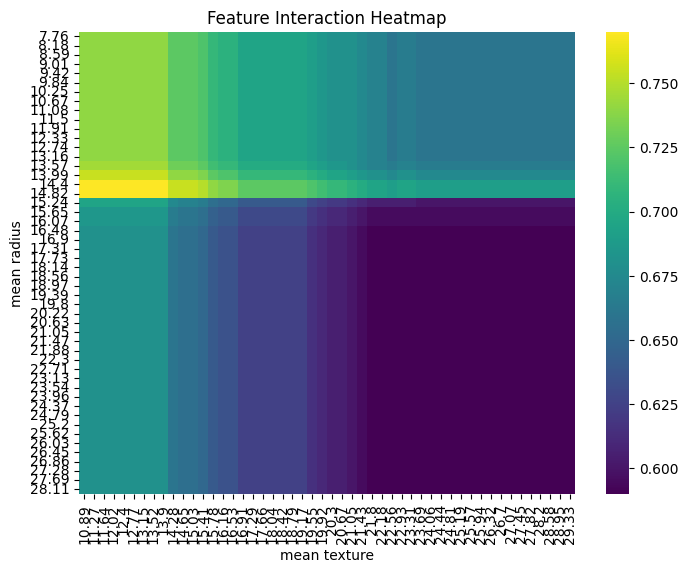

In [6]:
feature_1 = "mean radius"
feature_2 = "mean texture"

# Create grid values
f1_range = np.linspace(X_test[feature_1].min(), X_test[feature_1].max(), 50)
f2_range = np.linspace(X_test[feature_2].min(), X_test[feature_2].max(), 50)

grid = pd.DataFrame([
    {feature_1: f1, feature_2: f2}
    for f1 in f1_range
    for f2 in f2_range
])

# Fill other features with mean values
for col in X.columns:
    if col not in [feature_1, feature_2]:
        grid[col] = X_train[col].mean()

# Predict probabilities
probs = model.predict_proba(grid)[:, 1]

# Reshape predictions for heatmap
heatmap_data = probs.reshape(len(f1_range), len(f2_range))

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=np.round(f2_range, 2),
    yticklabels=np.round(f1_range, 2),
    cmap="viridis"
)

plt.xlabel(feature_2)
plt.ylabel(feature_1)
plt.title("Feature Interaction Heatmap")
plt.show()

---

## **🔍 Why Feature Interaction Heatmaps Matter**

- Reveal **non-linear interactions**
- Show how two features jointly affect predictions
- Detect thresholds or synergy effects
- Complement PDP and SHAP interaction values

Unlike PDP (which averages out other features), interaction heatmaps visualize **combined feature influence**.

---

## **🧠 Key Takeaways**

1. Feature interactions often drive complex model behavior.
2. Heatmaps help visualize joint feature influence.
3. Useful for detecting thresholds and non-linear regions.
4. Works well with tree-based models.
5. Complements SHAP interaction analysis.

---

## **Conclusion**

Feature Interaction Heatmaps provide a deeper look into how pairs of features influence model predictions together. By visualizing joint behavior, we uncover insights that single-feature methods cannot capture — making this technique an important tool in advanced model interpretability.

---